#  permutation feature importance

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

https://scikit-learn.org/stable/modules/permutation_importance.html

First, a model is fit on the dataset, such as a model that does not support native feature importance scores. Then the model is used to make predictions on a dataset, although the values of a feature (column) in the dataset are scrambled. This is repeated for each feature in the dataset. Then this whole process is repeated 3, 5, 10 or more times. The result is a mean importance score for each input feature (and distribution of scores given the repeats).

This approach can be used for regression or classification and requires that a performance metric be chosen as the basis of the importance score, such as the mean squared error for regression and accuracy for classification.

Permutation feature selection can be used via the permutation_importance() function that takes a fit model, a dataset (train or test dataset is fine), and a scoring function.

In [1]:
import sklearn
print(sklearn.__version__)

0.23.2


In [ ]:
#pip install --user -U scikit-learn

In [ ]:
!python -m pip install -U sklearn

In [ ]:
python -m pip install scikit-learn --upgrade

In [ ]:
pip install --upgrade pip

In [2]:

# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [3]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

In [4]:
# define the model
model = KNeighborsRegressor()

In [5]:
# fit the model
model.fit(X, y)

KNeighborsRegressor()

In [6]:
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')

In [7]:
# get importance
importance = results.importances_mean

In [8]:
importance

array([ 179.37367643,  374.6478267 ,  124.16072028,   49.17459596,
       9671.25819326, 7768.41285973,  901.6463219 ,  130.03628062,
        127.29515156,  101.31827213])

In [9]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 179.37368
Feature: 1, Score: 374.64783
Feature: 2, Score: 124.16072
Feature: 3, Score: 49.17460
Feature: 4, Score: 9671.25819
Feature: 5, Score: 7768.41286
Feature: 6, Score: 901.64632
Feature: 7, Score: 130.03628
Feature: 8, Score: 127.29515
Feature: 9, Score: 101.31827


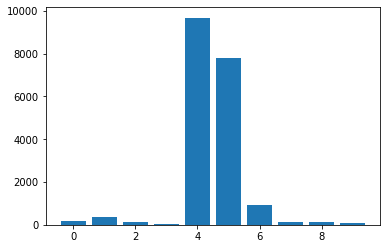

In [10]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Permutation Feature Importance for Classification

Feature: 0, Score: 0.05260
Feature: 1, Score: 0.06620
Feature: 2, Score: 0.05420
Feature: 3, Score: 0.09140
Feature: 4, Score: 0.05280
Feature: 5, Score: 0.05500
Feature: 6, Score: 0.07360
Feature: 7, Score: 0.05400
Feature: 8, Score: 0.05820
Feature: 9, Score: 0.02840


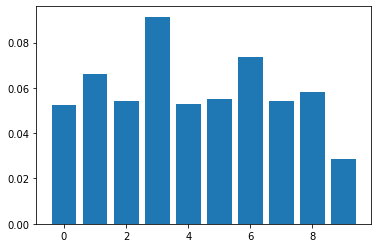

In [13]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

We can use the SelectFromModel class to define both the model we wish to calculate importance scores, RandomForestClassifier in this case, and the number of features to select, 5 in this case

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [16]:

# configure to select a subset of features
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
fs = SelectFromModel(RandomForestClassifier(n_estimators=200), max_features=5)

We can fit the feature selection method on the training dataset.

This will calculate the importance scores that can be used to rank all input features. We can then apply the method as a transform to select a subset of 5 most important features from the dataset. This transform will be applied to the training dataset and the test set.

In [19]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

ying this all together, the complete example of using random forest feature importance for feature selection is listed below.

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

In [21]:
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55
